<a href="https://colab.research.google.com/github/jucardozo/Trabajo-Practico-1-RedesNeuronales/blob/main/TP1RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Práctico 1

Juan Cardozo 60530


##Librerias Utiles

In [2]:
#Inclusion de librerias útiles
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import cv2
import albumentations as A
from tensorflow.keras.optimizers import SGD,AdamW
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import io
from google.colab import files
import draw_nn

# EDA


## Codigo.

In [3]:
#sentencias de importacion de input-output y google colab files

uploaded = files.upload()
data_trainDF = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
data_train = data_trainDF.values
# El filename es el nombre del archivo.

from google.colab import drive
drive.mount("/content/drive/")

Saving train_labels.csv to train_labels.csv
Mounted at /content/drive/


In [6]:

data_train.shape
data_train=data_train.reshape(60000)
data_train.shape
y_train=data_train
print(type(data_train))

## x_train -> Imagees 
##y_train -> Labels

<class 'numpy.ndarray'>


In [7]:
#Descargar set de datos de Fashion MNIST //despues ver como poner los del profe
imagenes=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/train_images.npy')
x_test=np.load('/content/drive/MyDrive/Dataset tp redes neuronales/fashion-mnist-itba-lab-2023q1/test_images.npy')
#Imprimir los metadatos para ver que trae el set




Funciones Secundarias.


In [8]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(imagenes, data_train , test_size=0.1, random_state=50)

x_train = list(imagenes[:len(X_train)])

new_labels=list(data_train[:len(X_train)])

#Funciones Utilizadas para hacer el data aumentation
def gen_imagen_FLIP(imagenes,etiquetas):
  for i in range(len(imagenes)):
    transform = A.HorizontalFlip(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
def gen_imagen_ROTATE(imagenes,etiquetas):   
  for i in range(len(imagenes)):
    transform = A.RandomRotate90(p=0.5)
    random.seed(7)
    x_train.append(transform(image=imagenes[i])['image'])
    new_labels.append(data_train[i])
    
#Funcion para normalizar la entrada 
#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1


#Ejecucion de las mismas
gen_imagen_FLIP(imagenes,list(data_train))
gen_imagen_ROTATE(imagenes,list(data_train))
x_train=np.array(x_train)
normalizar(x_train) 


Visualizacion de algunos de los datos de entrada 

0


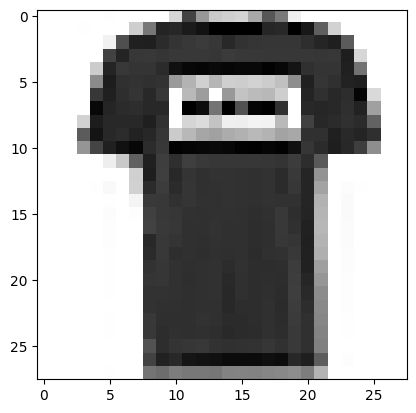

In [9]:
print(data_train[1]) #dato crudo
plt.imshow(imagenes[1],cmap=plt.cm.binary)

Dato luego del data aumentation

174000
174000
6


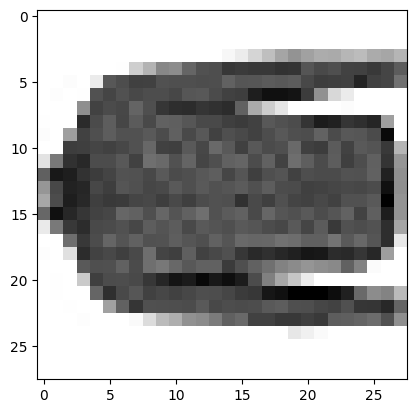

In [10]:
#Chusmeo el dato, Normalizado
print(len(new_labels))
print(len(x_train))
print(new_labels[120001])
plt.imshow(x_train[120001],cmap=plt.cm.binary)

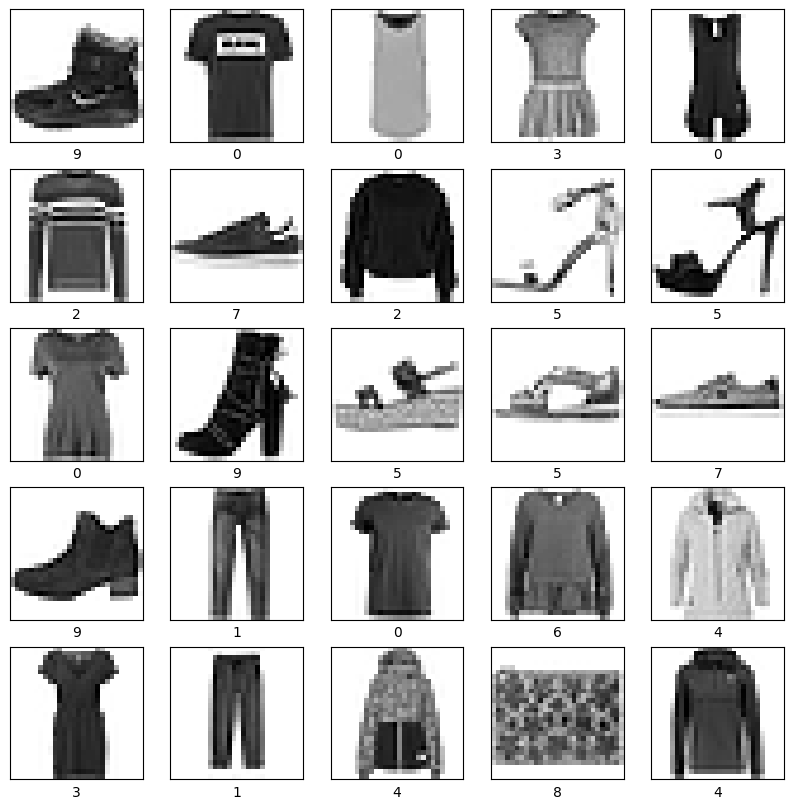

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(new_labels[i])
plt.show()

##Distribución de los Datos de entrada

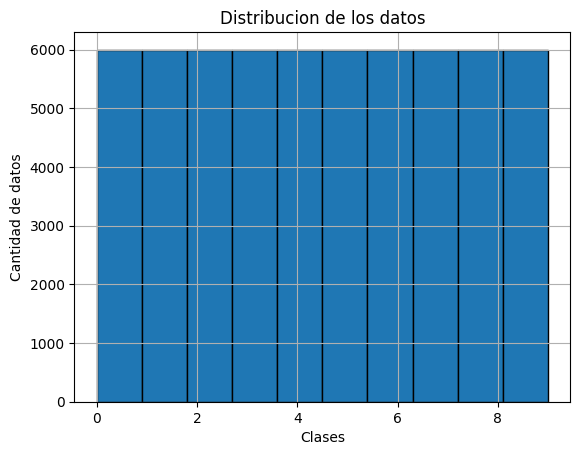

In [4]:
plt.hist(data_train,edgecolor='black')
plt.xlabel("Clases")
plt.ylabel("Cantidad de datos")
plt.title("Distribucion de los datos")
plt.grid()

In [11]:
y_sparse_train = np.zeros([len(x_train),10])
y_sparse_val = np.zeros([len(X_val),10])
for idx in range(len(x_train)):
    y_sparse_train[idx,new_labels[idx]] = 1
for idx in range(len(X_val)):
    y_sparse_val[idx,y_val[idx]] = 1


# SOFTMAX

##PRIMERA RED NEURONAL 

SOLO CON EL USO DE LA CAPA SOFTMAX.

In [16]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [17]:
#Compilo el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128,validation_data=(X_val, y_sparse_val) ,epochs=10)


Epoch 1/10
1360/1360 [==============================] - 10s 4ms/step - loss: 18.7787 - accuracy: 0.6463 - val_loss: 9.8844 - val_accuracy: 0.7002
Epoch 2/10
1360/1360 [==============================] - 4s 3ms/step - loss: 10.0396 - accuracy: 0.6937 - val_loss: 8.1047 - val_accuracy: 0.7067
Epoch 3/10
1360/1360 [==============================] - 4s 3ms/step - loss: 8.4037 - accuracy: 0.6956 - val_loss: 6.4680 - val_accuracy: 0.7272
Epoch 4/10
1360/1360 [==============================] - 5s 4ms/step - loss: 7.1865 - accuracy: 0.6998 - val_loss: 6.6634 - val_accuracy: 0.6827
Epoch 5/10
1360/1360 [==============================] - 4s 3ms/step - loss: 6.5468 - accuracy: 0.6984 - val_loss: 5.3179 - val_accuracy: 0.6857
Epoch 6/10
1360/1360 [==============================] - 4s 3ms/step - loss: 6.4061 - accuracy: 0.6975 - val_loss: 6.4954 - val_accuracy: 0.6923
Epoch 7/10
1360/1360 [==============================] - 5s 4ms/step - loss: 6.1367 - accuracy: 0.7005 - val_loss: 7.2279 - val_accura

##ALGUNOS GRAFICOS REPRESENTATIVOS

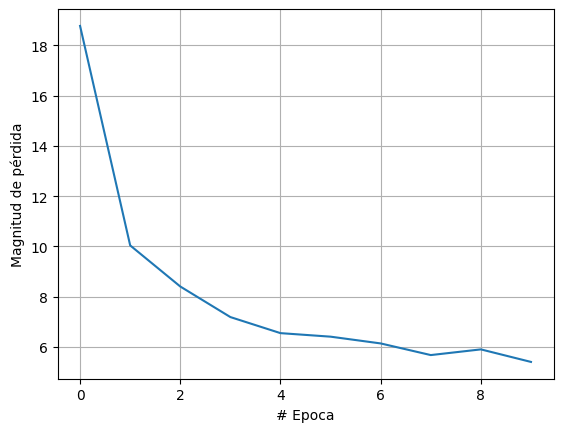

In [19]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

##METRICAS SECUNDARIAS

In [20]:
#AREA BAJO LA CURVA ROC => NO ENTIENDO SI SOBRE QUE TEST LO HAGO.
predictions_test = modelo.predict(X_val)
roc_auc_score(y_sparse_val, predictions_test)


188/188 [==============================] - 0s 2ms/step


0.9372955348125244

In [21]:
#F1_Score => Misma duda qye el anterios.
metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
presicion = metric.result()
print(presicion.numpy())
metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
recall = metric.result()
print(recall.numpy())
f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score:", f1_Score.numpy())

0.6458786
0.64383334
f1 score: 0.64485437


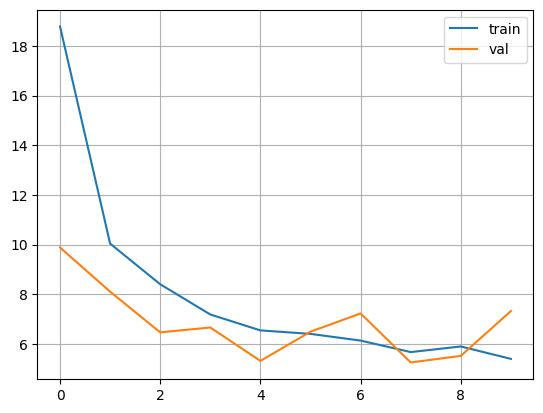

In [23]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
plt.grid()
plt.legend()
plt.show()

(784, 10)
[ 0.10346802 -2.0395894  -0.40137583 -0.17152584 -1.4550382   6.012682
  0.35263267  0.1256249  -1.5660933  -1.1853201 ]


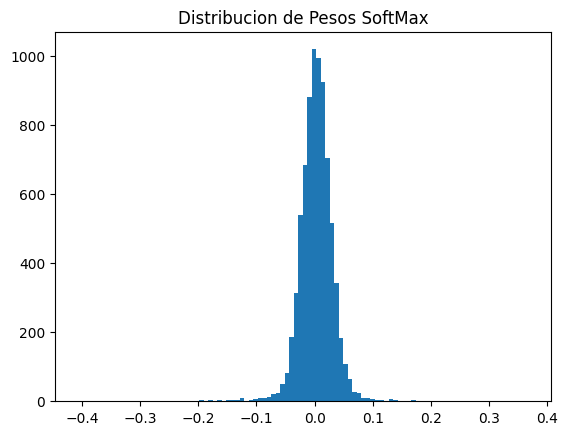

In [25]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos SoftMax")
plt.show()

##RED NEURONAL CON OPTIMIZADOR SGD LEARNING RATE (0.0001)

In [27]:
modeloSGD = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
modeloSGD.compile(
    optimizer=SGD(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
modeloSGD.summary()
#Entrenar
historial = modeloSGD.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1360/1360 [==============================] - 4s 3ms/step - loss: 27.6617 - accuracy: 0.5997
Epoch 2/20
1360/1360 [==============================] - 5s 4ms/step - loss: 18.4509 - accuracy: 0.6682
Epoch 3/20
1360/1360 [==============================] - 4s 3ms/step - loss: 17.1340 - accuracy: 0.6780
Epoch 4/20
1360/1360 [==============================] - 4s 3ms/step - loss: 15.9786 - accuracy: 0.6836
Epoch 5/20
1360/1360 [==============================] - 4s 3ms/step - loss: 16.0541 - accuracy: 0.6849
Epoch 6/20
1360/1360 [==============================] - 4s 3ms/step - loss: 15.6456 - accuracy: 0.6873
Epoch 7/20
1360/1360 [==============================] - 4s 3ms/step - loss: 15.3172 - accuracy: 0.6885
Epoch 8/20
1360/1360 [==============================] - 4s 3ms/step - loss: 15.4402 - accuracy: 0.6884
Epoch 9/20
1360/1360 [==============================] - 5s 4ms/step - loss: 14.8818 - accuracy: 0.6912
Epoch 10/20
1360/1360 [==============================] - 4s 3ms/step - lo

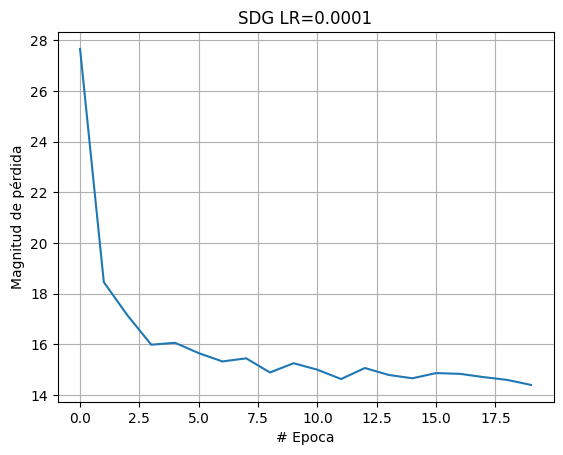

In [28]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("SDG LR=0.0001")
plt.plot(historial.history["loss"])

##INICIALIZADORES DE PESO

In [30]:
modeloW = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(10,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.softmax) #Para redes de clasificacion
])
modeloW.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]

)
modeloW.summary()
#Entrenar
historial = modeloW.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1360/1360 [==============================] - 4s 3ms/step - loss: 18.3994 - accuracy: 0.6495
Epoch 2/20
1360/1360 [==============================] - 4s 3ms/step - loss: 10.4636 - accuracy: 0.6945
Epoch 3/20
1360/1360 [==============================] - 4s 3ms/step - loss: 8.2456 - accuracy: 0.6982
Epoch 4/20
1360/1360 [==============================] - 7s 5ms/step - loss: 7.0518 - accuracy: 0.6985
Epoch 5/20
1360/1360 [================

(784, 10)
[ 0.00075163 -0.00420995 -0.00331578 -0.00026108 -0.01098202  0.02865797
  0.00294916  0.00115277 -0.01061414 -0.00412855]


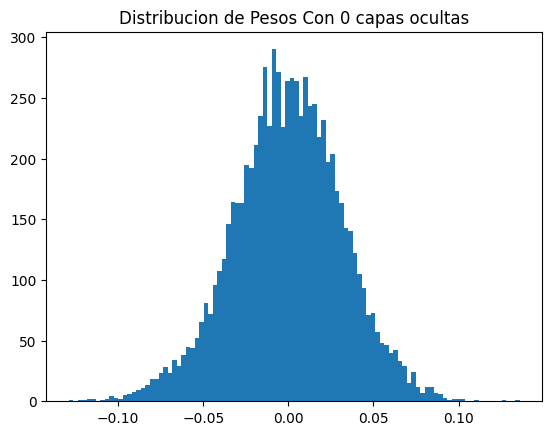

In [31]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 0 capas ocultas")
plt.show()

##CON BATCH NORMALIZATION.

In [34]:
modeloBN = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax,use_bias=False) #Para redes de clasificacion
])
modeloBN.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)
modeloBN.summary()
#Entrenar
historial = modeloBN.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 10)                7840      
                                                                 
Total params: 10,976
Trainable params: 9,408
Non-trainable params: 1,568
_________________________________________________________________
Epoch 1/20
1360/1360 [==============================] - 5s 3ms/step - loss: 0.7462 - accuracy: 0.7511
Epoch 2/20
1360/1360 [==============================] - 5s 4ms/step - loss: 0.6419 - accuracy: 0.7865
Epoch 3/20
1360/1360 [===================

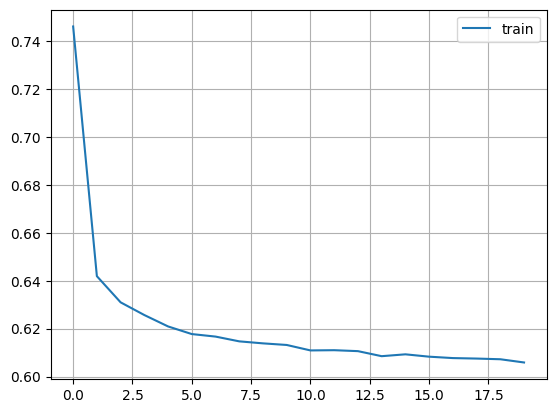

In [36]:
plt.plot(historial.history["loss"], label="train")
plt.grid()
plt.legend()
plt.show()

##RED NEURONAL VARIANDO EL TAMAÑO DE LA RED
1 CAPA OCULTA Y 50 NEURONAS

In [37]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [38]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1360/1360 [==============================] - 5s 3ms/step - loss: 2.9087 - accuracy: 0.3475
Epoch 2/20
1360/1360 [==============================] - 4s 3ms/step - loss: 1.4003 - accuracy: 0.4641
Epoch 3/20
1360/1360 [==============================] - 5s 3ms/step - loss: 1.1464 - accuracy: 0.5735
Epoch 4/20
1360/1360 [==============================] - 4s 3ms/step - loss: 0.8543 - accuracy: 0.6801
Epoch 5/20
1360/1360 [==============================] - 4s 3ms/step - loss: 0.7675 - accuracy: 0.7062
Epoch 6/20
1360/1360 [==============================] - 5s 4ms/step - loss: 0.7044 - accuracy: 0.7433
Epoch 7/20
1360/1360 [==============================] - 4s 3ms/step - loss: 0.6661 - accuracy: 0.7633
Epoch 8/20
1360/1360 [==============================] - 4s 3ms/step - loss: 0.6460 - accuracy: 0.7709
Epoch 9/20
1360/1360 [==============================] - 5s 4ms/step - loss: 0.6323 - accuracy: 0.7761
Epoch 10/20
1360/1360 [==============================] - 4s 3ms/step - loss: 0.619

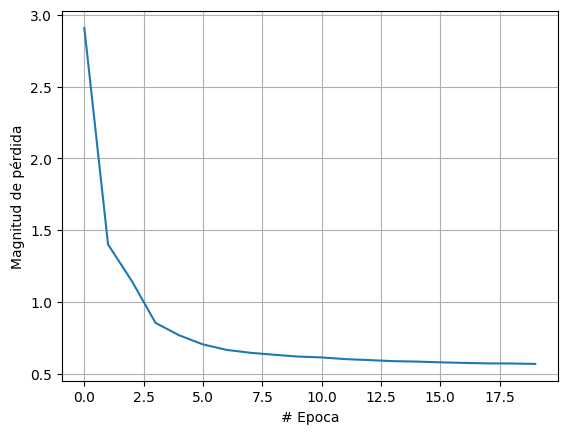

In [40]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

(784, 50)
[-0.02496487 -0.03283964 -0.02828025 -0.02082168 -0.00851129 -0.03734339
 -0.0655422  -0.04766131 -0.03789806 -0.03269349  1.0128189  -0.04637274
 -0.04054955 -0.03960359 -0.02605555  0.08787762 -0.02925342 -0.06197541
 -0.04763134 -0.02443225 -0.608605   -0.11058741 -0.02281581 -0.03215019
 -0.01252689 -0.02921743 -0.04294937 -0.07360364 -0.0338944   2.0609343
 -0.0293043   1.1677308   2.415998    2.3671305   0.08239309 -0.03459159
  1.1935017   1.1178808   0.61258197 -0.05323679 -0.04695118 -0.05406702
 -0.2123302   1.3293028  -0.03138576 -0.03670791  1.6301006  -0.01552295
  4.4304743   0.10794237]


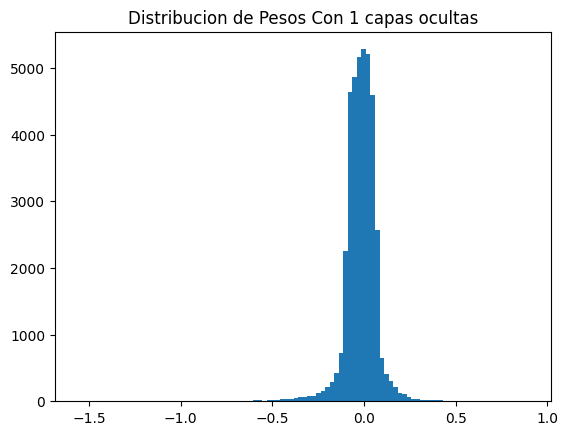

In [41]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 1 capas ocultas")
plt.show()

##RED NEURONAL VARIANDO EL TAMAÑO DE LA RED 2 CAPAS OCULTA 

In [42]:

modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,kernel_constraint=tf.keras.constraints.max_norm(5)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(50,kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu,),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [43]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 50)                2550      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Epoch 1/20
1360/1360 [==============================] - 7s 4ms/step - loss: 2.4526 - accuracy: 0.1940
Epoch 2/20
1360/1360 [==============================] - 5s 3ms/step - loss: 1.7964 - accuracy: 0.2947
Epoch 3/20
1360/1360 [==============================] - 5s 3ms/step - loss: 1.6735 - accuracy: 0.3363
Epoch 4/20
1360/1360 [==============================] - 6s 4ms/step - loss: 1.6009 - accuracy: 0.3694
Epoch 5/20
1360/1360 [==============================] - 4s 3ms/step - loss: 1.5603 - accuracy: 0.3830
Epoch 6/20
1360/1360 [==============================] - 5s 3ms/step - loss: 1.5342 - accuracy: 0.3940
Epoch 7/20
1360/1360 [==============================] - 6s 4ms/step - loss: 1.4815 - accuracy: 0.4173
Epoch 8/20
1360/1360 [==============================] - 4s 3ms/step - loss: 1.4231 - accuracy: 0.4425
Epoch 9/20
1360/1360 [==============================] - 5s 3ms/step - loss: 1.3932 - accuracy: 0.4537
Epoch 10/20
1360/1360 [==============================] - 6s 4ms/step - loss: 1.368

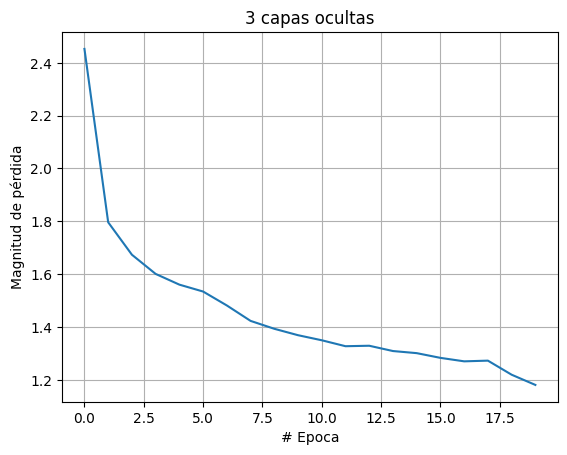

In [45]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("3 capas ocultas")
plt.plot(historial.history["loss"])

(784, 50)
[-0.11961862 -0.02394614  0.5713745   0.29399645 -0.02136964 -0.03828163
 -0.00989564 -0.06102398 -0.03284531 -0.02177331 -0.03525725  0.166462
 -0.03340343  1.0045316   1.3016626   1.1437628   0.8647395  -0.03960962
  1.3361105  -0.05809966  0.83347106  0.81572044  0.8013234  -0.0331176
 -0.02542203 -0.06307875 -0.04077796 -0.06515087 -0.01036572 -0.06470363
 -0.02677876 -0.0342939  -0.05289649 -0.04063063  0.90503305  0.36722064
 -0.0294077  -0.01643348  0.378111   -0.02192137  0.95372546 -0.03620104
 -0.03047071  0.6128656   0.6738339  -0.00694082 -0.03021109 -0.04268934
 -0.02327881 -0.02203505]


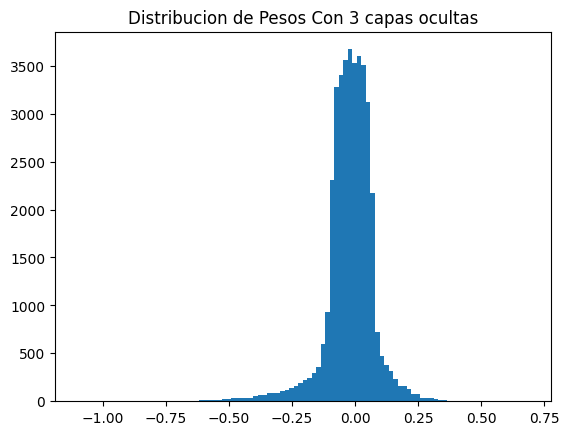

In [46]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Con 3 capas ocultas")
plt.show()

##FUNCIONES DE ACTIVACION DISTINTAS A LA RELU. 

In [47]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(100, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(50, activation=tf.nn.sigmoid),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

modelo.summary()
#Entrenar
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 128, epochs=20)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
Total params: 94,160
Trainable params: 94,160
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1360/1360 [===========================

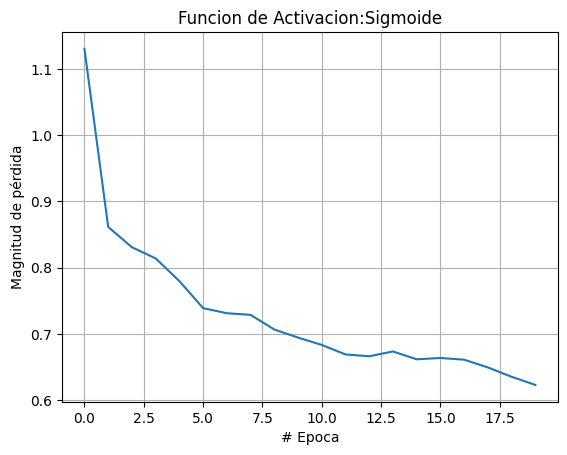

In [48]:
plt.xlabel("# Epoca")
plt.grid()
plt.ylabel("Magnitud de pérdida")
plt.title("Funcion de Activacion:Sigmoide")
plt.plot(historial.history["loss"])

# MLP


##**RED NEURONAL DE MEJOR PERFOMANCE . TEST 0.89:**
  
  La red de mejor desempeño constaba de dos capas de 500 neuronas , con una capa de entrada tipo *FLATTEN* y una de salida tipo *SOFTMAX*, tambien se destaca el uso de los *batch normalization* como asi tambien del *dropout*, pero con el fin de agilizar los tiempo de ejecución, se lo cambio por una red de 100 neuronas en cada capa. Tambien , se dejo de usar la tecnica de *dropout* por que al ser una red chica, la performance se ve afectada.

Doble Capa , Con optimizador Adam , Batch Normalization , dropoutop

In [49]:
#Creo el modelo
modelo = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.relu),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])


In [50]:
#Compilo el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['Accuracy']
)
modelo.summary()
#modelo.save("model_without_training")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 200)               157000    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 200)             

In [51]:
#Entrenar
earlyStopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=0.9,
    restore_best_weights=False,
)
historial = modelo.fit(x = x_train, y = y_sparse_train,batch_size = 200, validation_data=(X_val, y_sparse_val),epochs=20)#,verbose=0)
acc=np.array(historial.history["val_Accuracy"])
modelo.save("trained_model")

#for idx, value in enumerate(acc):
#  if value > 0.9:
#    print(idx)


Epoch 1/20
870/870 [==============================] - 7s 5ms/step - loss: 0.5689 - Accuracy: 0.7989 - val_loss: 0.3704 - val_Accuracy: 0.8590
Epoch 2/20
870/870 [==============================] - 5s 6ms/step - loss: 0.4145 - Accuracy: 0.8509 - val_loss: 0.3120 - val_Accuracy: 0.8810
Epoch 3/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3738 - Accuracy: 0.8642 - val_loss: 0.2876 - val_Accuracy: 0.8902
Epoch 4/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3470 - Accuracy: 0.8724 - val_loss: 0.2687 - val_Accuracy: 0.8977
Epoch 5/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3280 - Accuracy: 0.8788 - val_loss: 0.2586 - val_Accuracy: 0.9003
Epoch 6/20
870/870 [==============================] - 5s 6ms/step - loss: 0.3127 - Accuracy: 0.8842 - val_loss: 0.2434 - val_Accuracy: 0.9073
Epoch 7/20
870/870 [==============================] - 4s 5ms/step - loss: 0.3016 - Accuracy: 0.8878 - val_loss: 0.2277 - val_Accuracy: 0.9122
Epoch 

##**PREDICCION Y EVALUCION**

In [52]:
y_test = modelo.predict(x_test)
labels = np.array([np.argmax(prediction) for prediction in y_test])
submission=pd.DataFrame({"id": np.arange(10000) , "Category" : labels})
submission.to_csv("submission.csv",index=False)


313/313 [==============================] - 1s 2ms/step


##**MEDIDAS SECUNDARIAS, F1 score, Curva ROC** 

*AREA BAJO LA CURVA ROC*


In [53]:

predictions_test = modelo.predict(X_val)
roc_auc_score(y_sparse_val, predictions_test)


188/188 [==============================] - 0s 2ms/step


0.9971879474750273

*F1_SCORE, RECALL Y PRESICION*

In [54]:

metric = tf.keras.metrics.Precision(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
presicion = metric.result()
print("presicion:",presicion.numpy())
metric = tf.keras.metrics.Recall(thresholds=0.5)
metric.update_state(y_sparse_val, predictions_test)
recall = metric.result()
print("recall:",recall.numpy())
f1_Score=(2*(presicion*recall))/(presicion+recall)
print("f1 score:", f1_Score.numpy())

presicion: 0.9459963
recall: 0.93133336
f1 score: 0.9386076


##**GRAFICOS DE INTEREZ**

(784,)
[ 3.53935882e-02  1.83025569e-01  6.31437525e-02  1.50253966e-01
  1.59054384e-01  3.58278811e-01  2.07808167e-01  2.49400452e-01
  1.93979084e-01  5.30750453e-01  2.02061504e-01  1.76320061e-01
  2.05988050e-01  6.53054118e-01  3.19902956e-01  2.97130674e-01
 -1.50554821e-01  1.19126223e-01  2.73720354e-01  4.80864555e-01
  2.90683985e-01  7.30084702e-02  2.97095776e-01  2.89645761e-01
  3.94870222e-01  2.48053133e-01 -8.51119608e-02  3.58086228e-01
  6.69315979e-02  3.39526504e-01  1.72284484e-01  8.79824013e-02
  5.13533354e-01  1.72527969e-01  2.78267562e-01  5.95494866e-01
  4.10959989e-01  2.29349494e-01  5.01708806e-01  2.04486206e-01
  9.15098637e-02  2.23042950e-01  2.97344476e-01  3.68766099e-01
 -1.22081608e-01  1.27469093e-01 -1.87044084e-01  3.69785309e-01
  2.86166072e-01  3.00141484e-01  3.49891603e-01  2.55520403e-01
  2.09923774e-01  4.42863628e-02  2.65314970e-02  8.37451890e-02
  1.99355364e-01  6.67850077e-02  1.14672467e-01  1.73043892e-01
  1.05033584e-01  

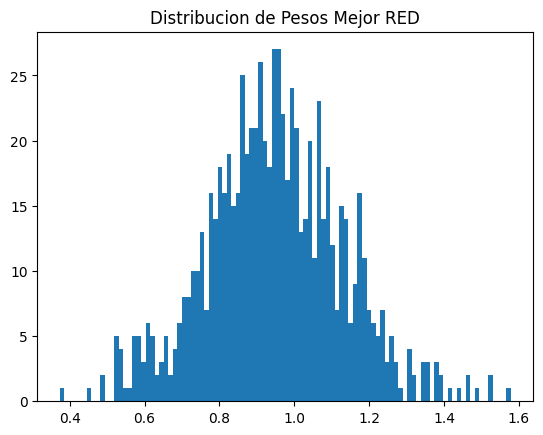

In [55]:
weights = modelo.get_weights()[0]
biases = modelo.get_weights()[1]
print(weights.shape)
print(biases)
plt.hist(weights.flatten(), 100)
plt.title("Distribucion de Pesos Mejor RED")
plt.show()

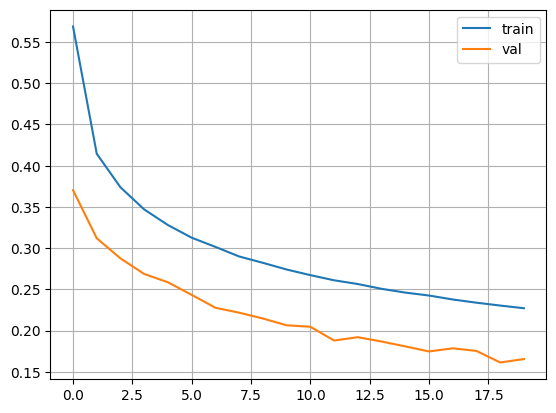

In [56]:
plt.plot(historial.history["loss"], label="train")
plt.plot(historial.history["val_loss"], label="val")
plt.legend()
plt.grid()
plt.show()

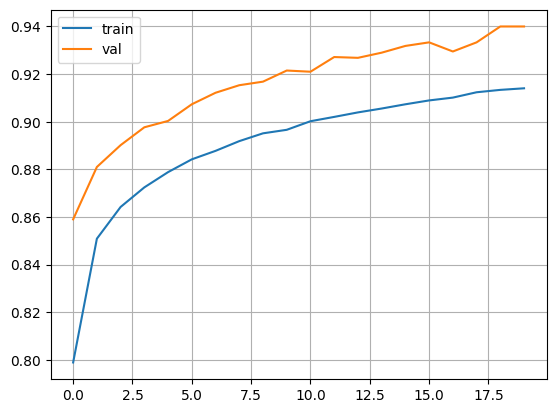

In [57]:
plt.plot(historial.history["Accuracy"], label="train")
plt.plot(historial.history["val_Accuracy"], label="val")
plt.grid()
plt.legend()
plt.show()

##**ACCURACY VS VARIACIONES DE DISTINTOS PARAMETROS**

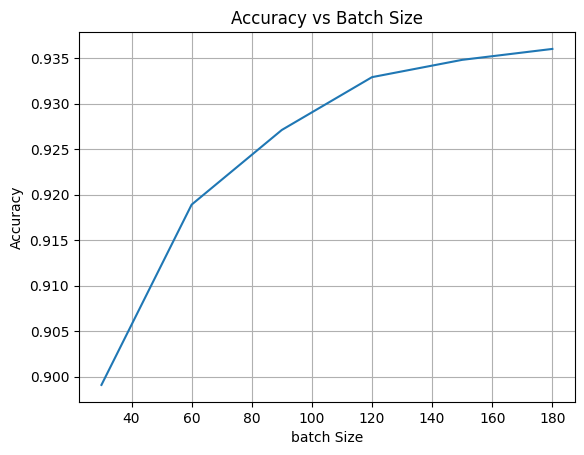

In [ ]:
x=[30,60,90,120,150,180]
y=[0.8991,0.9189,0.9271,0.9329,0.9348,0.9360]
plt.plot(x,y)
plt.xlabel('batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Batch Size')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Accuracy vs Inicializadores')

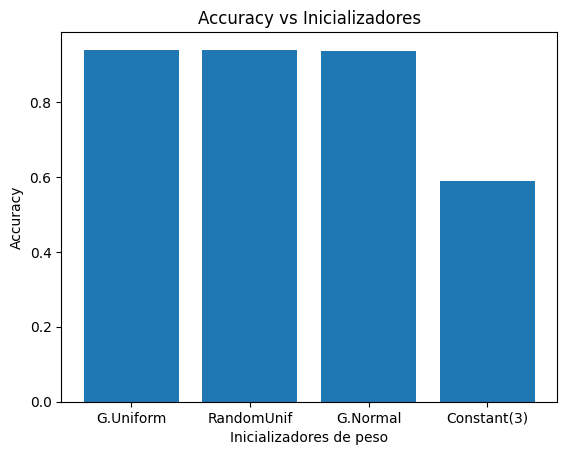

In [ ]:
accuracy=[0.9391,0.9377,0.9368,0.5882]
inicializ=['G.Uniform','RandomUnif','G.Normal','Constant(3)']
plt.bar(inicializ, accuracy)
plt.xlabel("Inicializadores de peso")
plt.ylabel("Accuracy")
plt.ylimit(5,0)
plt.title("Accuracy vs Inicializadores")


Text(0.5, 1.0, 'Accuracy vs F.Activacion')

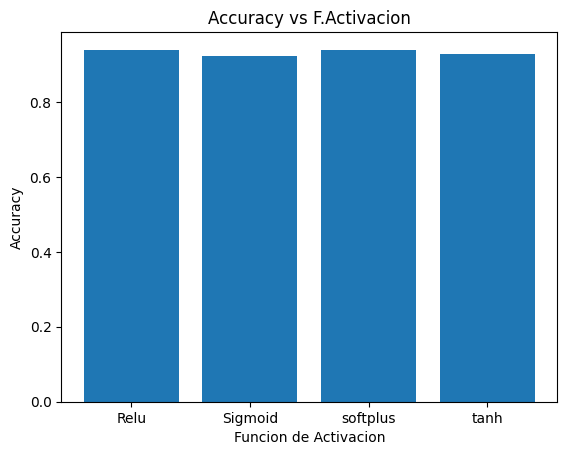

In [ ]:
accuracy=[0.9391,0.9225,0.9380,0.9284]
inicializ=['Relu','Sigmoid','softplus','tanh']
plt.bar(inicializ, accuracy)
plt.xlabel("Funcion de Activacion")
plt.ylabel("Accuracy")
plt.title("Accuracy vs F.Activacion")


Text(0.5, 1.0, 'Accuracy vs Learning Rate')

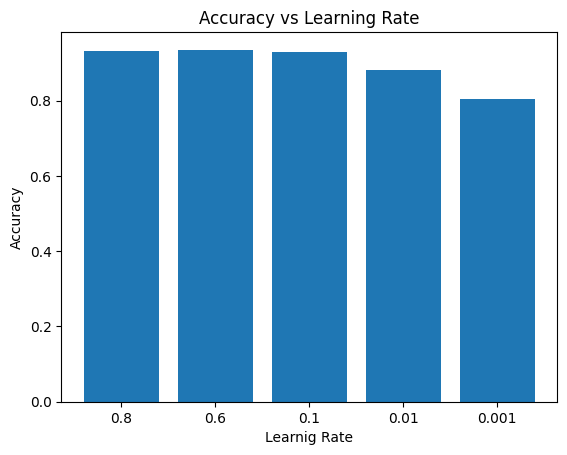

In [ ]:
accuracy=[0.9323,0.9349,0.9282,0.8804,0.8029]
inicializ=['0.8','0.6','0.1','0.01','0.001']
plt.bar(inicializ, accuracy)
plt.xlabel("Learnig Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")

##**EPOCH VS VARIACIONES DE DISTINTOS PARAMETROS**

  PARA PODER TENER UNA OBSERVACION MÁS SIGNIFICATIVA DE LOS EPOCHS, SE PUSO UN THRESHOLD A LOS 0.9 DE VAL_ACCURACY. DE ESTA MANERA SABEMOS CUANTAS EPOCHS TARDARON EN LLEGAR A DICHA CONDICION. 
  ADEMAS, PARA EL RESTO DE LAS COMPARACIONES , SE MANTIENE LA CONDICION DE MEJOR PERFORMANCE , SOLAMENTE VARIANDO LA QUE SE QUIERE MOSTRAR.

Text(0.5, 1.0, 'Epoch vs Optimizador')

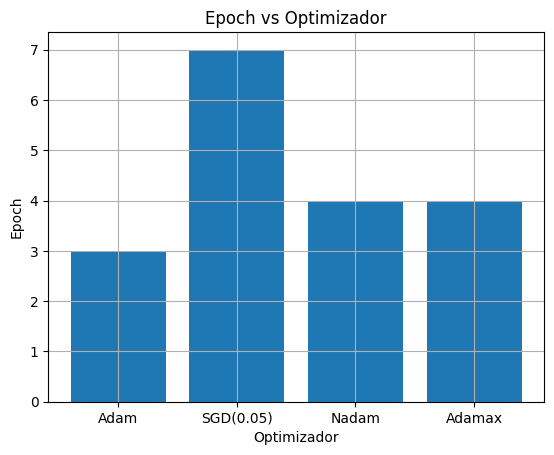

In [ ]:
Epoch=[6,7,4,4]
inicializ=['Adam','SGD(0.05)','Nadam','Adamax']
plt.bar(inicializ, Epoch)
plt.xlabel("Optimizador")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Optimizador")

Text(0.5, 1.0, 'Epoch vs Optimizador')

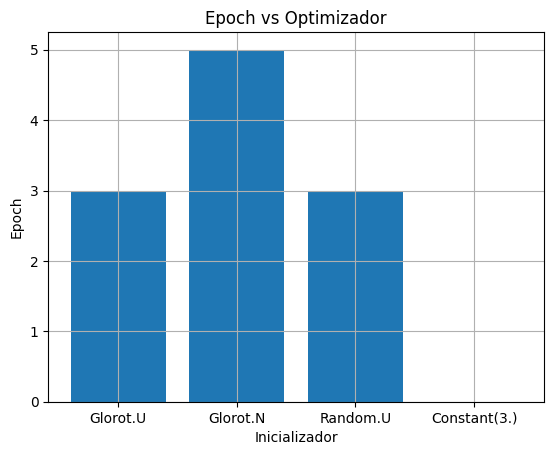

In [ ]:
Epoch=[3,5,3,0]
inicializ=['Glorot.U','Glorot.N','Random.U','Constant(3.)']
plt.bar(inicializ, Epoch)
plt.xlabel("Inicializador")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Inicializador")

Text(0.5, 1.0, 'Epoch vs Activacion')

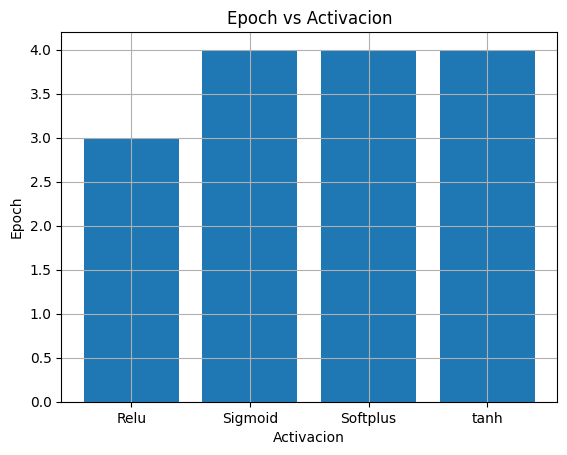

In [ ]:
Epoch=[3,4,4,4]
inicializ=['Relu','Sigmoid','Softplus','tanh']
plt.bar(inicializ, Epoch)
plt.xlabel("Activacion")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Activacion")

Text(0.5, 1.0, 'Epoch vs Learning Rate')

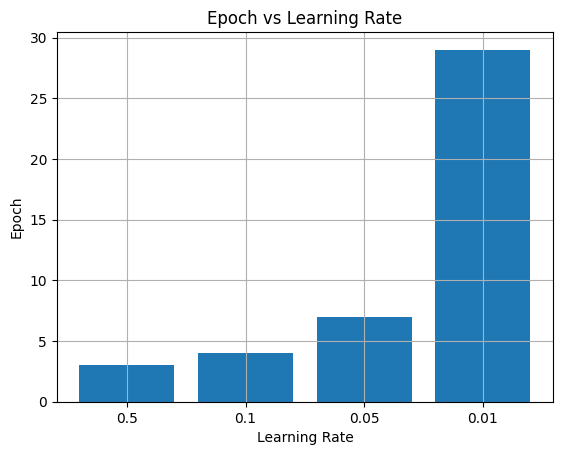

In [ ]:
Epoch=[3,4,7,29]
inicializ=['0.5','0.1','0.05','0.01']
plt.bar(inicializ, Epoch)
plt.xlabel("Learning Rate")
plt.ylabel("Epoch")
plt.grid()
plt.title("Epoch vs Learning Rate")

##Iniciso 3


In [59]:
modelo_3 = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.relu),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.BatchNormalization(momentum=0.99),
   tf.keras.layers.Dense(2,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax,name='salida') #Para redes de clasificacion
])
modelo_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['Accuracy']
)
modelo_3.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='modelo_3_checkpoint.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_Accuracy')


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 200)               157000    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_22 (Dense)            (None, 200)             

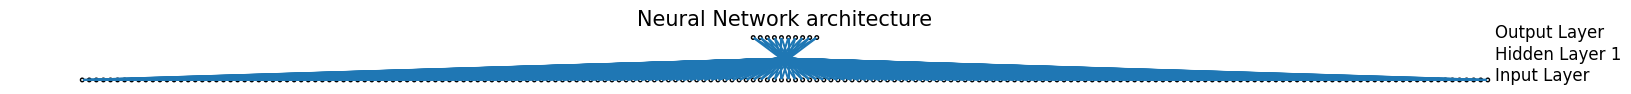

In [60]:
network = draw_nn.DrawNN( [200,2, 10] )
network.draw()

In [61]:
historial_3 = modelo_3.fit(x = x_train, y = y_sparse_train,batch_size = 200, validation_data=(X_val, y_sparse_val),epochs=20,callbacks=[checkpointer])#,verbose=0)

Epoch 1/20
863/870 [============================>.] - ETA: 0s - loss: 1.4371 - Accuracy: 0.4983
Epoch 1: val_Accuracy improved from -inf to 0.67883, saving model to modelo_3_checkpoint.hdf5
870/870 [==============================] - 7s 5ms/step - loss: 1.4349 - Accuracy: 0.4997 - val_loss: 1.0921 - val_Accuracy: 0.6788
Epoch 2/20
865/870 [============================>.] - ETA: 0s - loss: 1.0224 - Accuracy: 0.6864
Epoch 2: val_Accuracy improved from 0.67883 to 0.72567, saving model to modelo_3_checkpoint.hdf5
870/870 [==============================] - 5s 6ms/step - loss: 1.0219 - Accuracy: 0.6866 - val_loss: 0.8491 - val_Accuracy: 0.7257
Epoch 3/20
870/870 [==============================] - ETA: 0s - loss: 0.8552 - Accuracy: 0.7164
Epoch 3: val_Accuracy improved from 0.72567 to 0.75117, saving model to modelo_3_checkpoint.hdf5
870/870 [==============================] - 5s 5ms/step - loss: 0.8552 - Accuracy: 0.7164 - val_loss: 0.7179 - val_Accuracy: 0.7512
Epoch 4/20
862/870 [===========

In [62]:
model_trunc =tf.keras.Model(modelo_3.input, modelo_3.layers[-2].output)
model_trunc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12_input (InputLaye  [(None, 28, 28)]         0         
 r)                                                              
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 200)               157000    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 200)              800   

In [67]:
predictions = model_trunc.predict(np.vstack([x_train, X_val]), verbose=1)
maxs = np.max(predictions, axis=0)
mins = np.min(predictions, axis=0)
print(maxs, mins)

5625/5625 [==============================] - 10s 2ms/step
[522.82776 182.9096 ] [0. 0.]


In [68]:
predictions_train = model_trunc.predict(X_train, verbose=1)

1688/1688 [==============================] - 3s 2ms/step


In [69]:
# Calculo de entorno
N = 500
x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], N), np.linspace(mins[1], maxs[1], N))
x_mesh = np.c_[x1.ravel(), x2.ravel()]
model_last_trunc = tf.keras.Sequential()
model_last_trunc.add(tf.keras.layers.Dense(10, input_shape=(2,)))
model_last_trunc.set_weights(modelo_3.get_layer('salida').get_weights())
pred_mesh = model_last_trunc.predict(x_mesh, verbose=1)
Z = np.argmax(pred_mesh, axis=1).reshape(x1.shape)/10

7813/7813 [==============================] - 9s 1ms/step


In [76]:
print(len(predictions_train))
print(len(y_val))


54000
6000


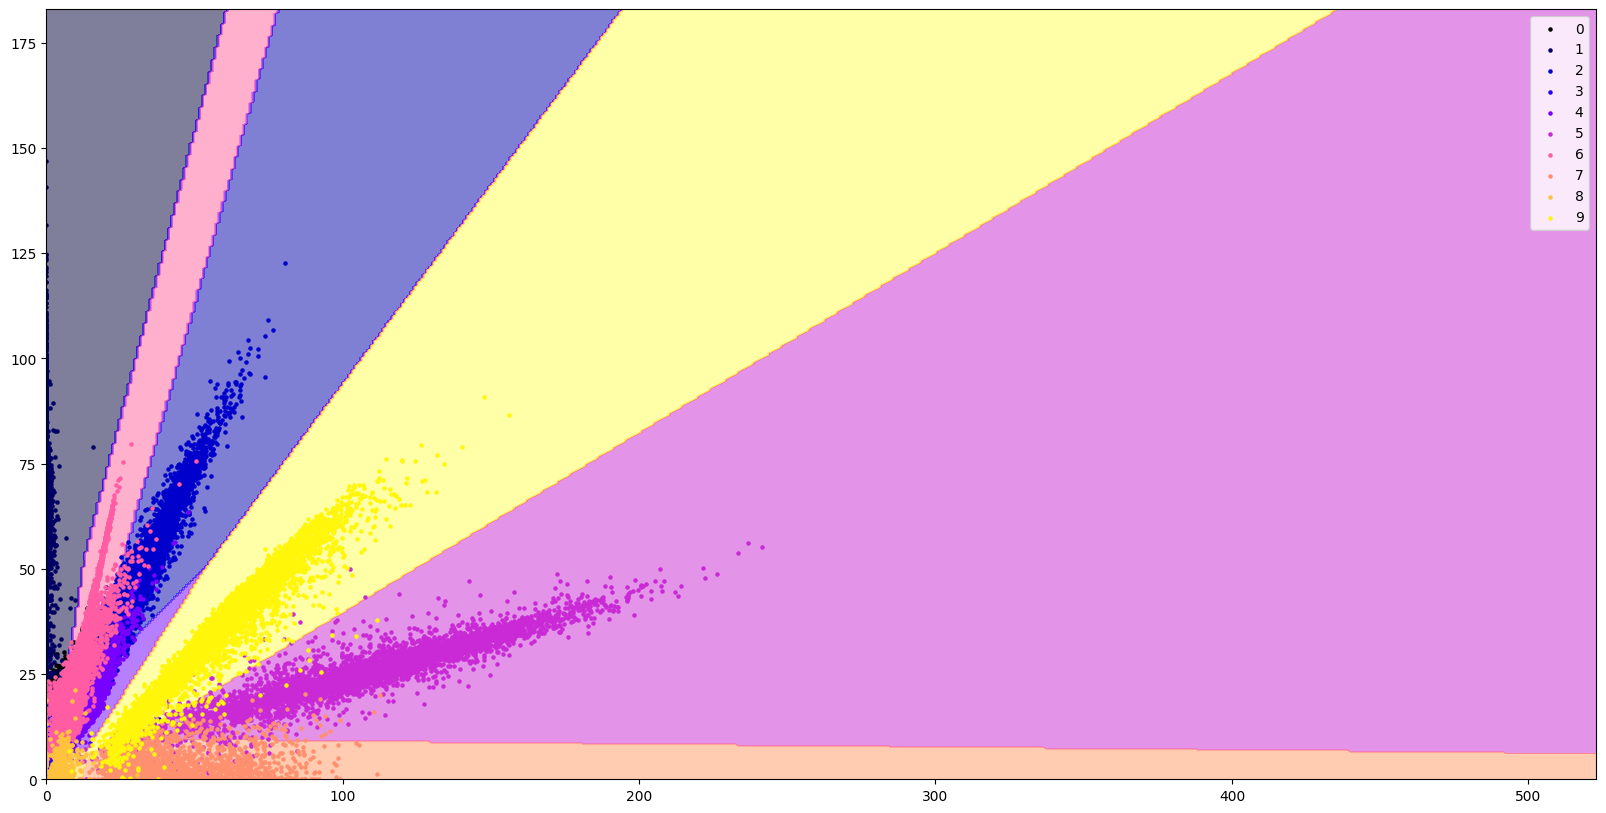

In [79]:
plt.figure(figsize=(20,10))
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.gnuplot2, alpha=0.5)
#for i, c in enumerate(['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'gray', 'purple', 'cyan']):
for i in range(10):
    plt.scatter(predictions_train[y_train == i, 0], predictions_train[y_train == i, 1], c=[plt.cm.gnuplot2(i/10)], s=5, label=str(i))
plt.legend()
plt.show()

188/188 [==============================] - 0s 2ms/step


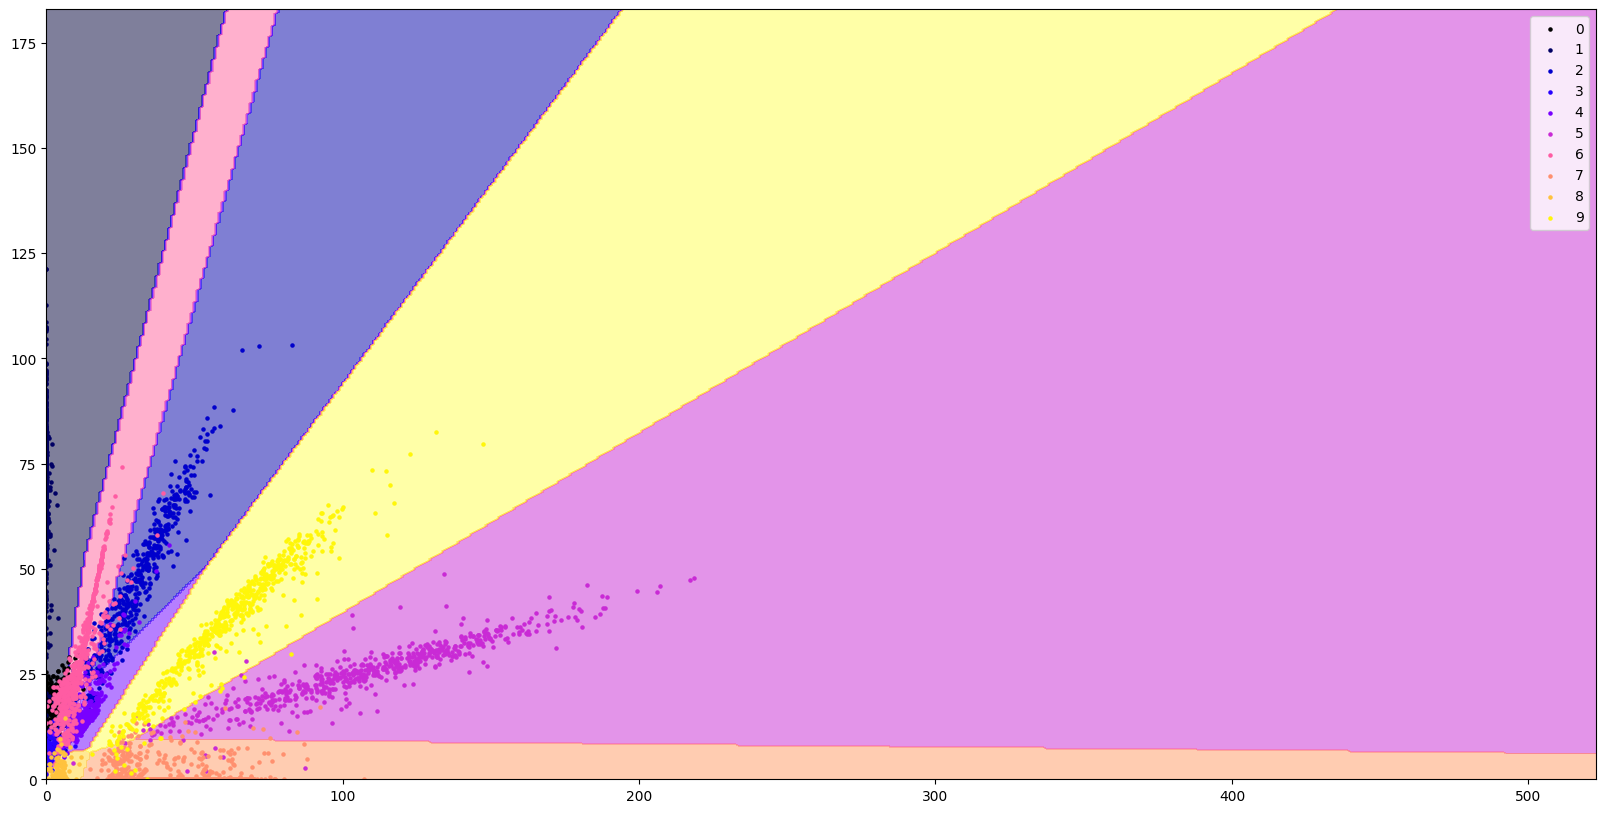

In [78]:
predictions_val = model_trunc.predict(X_val, verbose=1)
plt.figure(figsize=(20,10))
plt.contourf(x1, x2, Z, 10, cmap=plt.cm.gnuplot2, alpha=0.5)
#for i, c in enumerate(['red', 'green', 'blue', 'yellow', 'black', 'orange', 'brown', 'gray', 'purple', 'cyan']):
for i in range(10):
    plt.scatter(predictions_val[y_val == i, 0], predictions_val[y_val == i, 1], c=[plt.cm.gnuplot2(i/10)], s=5, label=str(i))
plt.legend()
plt.show()

##**Iniciso 4**

In [ ]:

model_wo_training = tf.keras.models.load_model("model_without_training")
model_w_training = tf.keras.models.load_model("trained_model")


# Calculate weight differences
initial_weights = model_wo_training.get_weights()
final_weights = model_w_training.get_weights()

weight_diff = [np.abs(initial - final) for initial, final in zip(initial_weights, final_weights)]

# Flatten and sort weight differences
flattened_diff = np.concatenate([arr.flatten() for arr in weight_diff])
sorted_indices = np.argsort(flattened_diff)[::-1]

# Determine the threshold value for the top 50% weights
threshold_index = int(len(sorted_indices) * 0.5)
threshold = flattened_diff[sorted_indices[threshold_index]]

# Set weights above the threshold to their initial values, and the rest to zero
modified_weights = []
for initial, final in zip(initial_weights, final_weights):
    mask = np.abs(final - initial) >= threshold
    modified_weights.append(np.where(mask, initial, 0.0))

final_model =tf.keras.models.load_model("model_without_training")
final_model.set_weights(modified_weights)
test_loss, test_accuracy = final_model.evaluate(X_val, y_sparse_val)
print(test_loss, test_accuracy)

#adam = tf.keras.optimizers.Adam(lr=0.001) #decay=1e-4
#checkpointer = tf.keras.ModelCheckpoint(filepath='mpl.mnist.hdf5', verbose=1, save_best_only=True, mode='max', monitor='val_accuracy')
final_model = tf.keras.models.load_model("model_without_training")
final_model.set_weights(modified_weights)
historial_LT = final_model.fit(x = x_train, y = y_sparse_train,batch_size = 200, validation_data=(X_val, y_sparse_val),epochs=20)#,verbose=0)

188/188 [==============================] - 1s 2ms/step - loss: 15.0721 - Accuracy: 0.0972
15.072098731994629 0.09716666489839554
Epoch 1/20
870/870 [==============================] - 15s 15ms/step - loss: 0.5762 - Accuracy: 0.8002 - val_loss: 0.3463 - val_Accuracy: 0.8700
Epoch 2/20
870/870 [==============================] - 15s 17ms/step - loss: 0.4006 - Accuracy: 0.8543 - val_loss: 0.3100 - val_Accuracy: 0.8810
Epoch 3/20
870/870 [==============================] - 13s 15ms/step - loss: 0.3630 - Accuracy: 0.8679 - val_loss: 0.2890 - val_Accuracy: 0.8903
Epoch 4/20
870/870 [==============================] - 17s 20ms/step - loss: 0.3402 - Accuracy: 0.8754 - val_loss: 0.2754 - val_Accuracy: 0.8972
Epoch 5/20
870/870 [==============================] - 15s 17ms/step - loss: 0.3230 - Accuracy: 0.8810 - val_loss: 0.2619 - val_Accuracy: 0.9007
Epoch 6/20
870/870 [==============================] - 13s 15ms/step - loss: 0.3115 - Accuracy: 0.8848 - val_loss: 0.2436 - val_Accuracy: 0.9077
Epoch 7

# PROBLEMA DE REGRESION

In [ ]:
from tensorflow.keras.datasets import mnist
import pandas as pd
(x_train_mnist, y_train_mnist) , (x_test_mnist, y_test_mnist) = mnist.load_data()
uploaded = files.upload()
train_morpho  = pd.read_csv(io.BytesIO(uploaded['train-morpho.csv']))

#train_morpho = pd.read_csv("train-morpho.csv")
uploaded = files.upload()
test_morpho =pd.read_csv(io.BytesIO(uploaded['t10k-morpho.csv']))
#test_morpho = pd.read_csv("t10k-morpho.csv")

Saving train-morpho.csv to train-morpho.csv


Saving t10k-morpho.csv to t10k-morpho.csv


In [ ]:
data_train_orig=train_morpho.values
data_test_orig=test_morpho.values
#Datos importantes como la inclinacion
data_train=data_train_orig[0:60000,4]
data_test=data_test_orig[0:60000,4]
y_train_morpho=data_train.reshape(60000)
y_test_morpho=data_test.reshape(10000)

#se crean los arreglos para hacer el analisis de la correlación.
data_train_A=data_train_orig[0:60000,1]  #Area
data_train_L=data_train_orig[0:60000,2] #Logintud
data_train_T=data_train_orig[0:60000,3] #espectro
data_train_W=data_train_orig[0:60000,5] #ancho
data_test_W=data_test_orig[0:10000,5]
data_train_H=data_train_orig[0:60000,6] #alto
    
y_train_morpho_A=data_train_A.reshape(60000)
y_train_morpho_L=data_train_L.reshape(60000)
y_train_morpho_T=data_train_T.reshape(60000)
y_train_morpho_W=data_train_W.reshape(60000)
y_test_morpho_W=data_test_W.reshape(10000)
y_train_morpho_H=data_train_H.reshape(60000)

**EDA**

##Correlacion

In [ ]:
def coefcorr(x,y):
  plt.figure(figsize=(5, 5))
  plt.scatter(x,y)
  plt.title("Correlacion")
  plt.show()
  return np.corrcoef(x,y)
 


VIENDO LOS RESULTADOS DEL COEFICIENTE DE CORRELACION, NOS DAMOS CUENTA QUE LA MAS CORRELACIONADA ES EL EL *ANCHO*, ASI QUE ELEGIREMOS ESA VARIABLE.

Coeficiente de Correlacion con la Area:


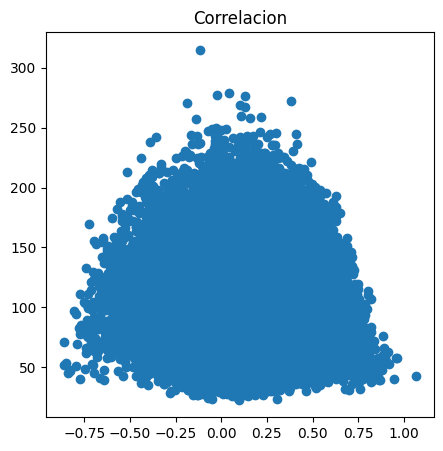

[[ 1.         -0.00536736]
 [-0.00536736  1.        ]]
Coeficiente de Correlacion con la Longtitud:


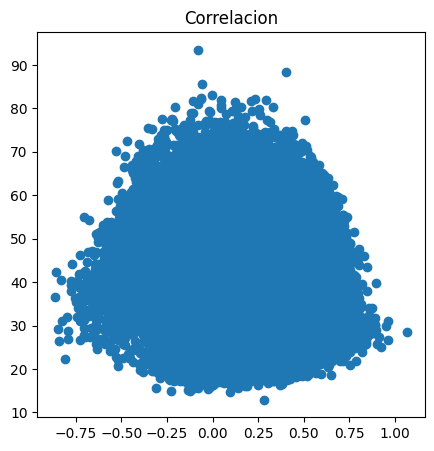

[[ 1.         -0.02026938]
 [-0.02026938  1.        ]]
Coeficiente de Correlacion con el Espectro:


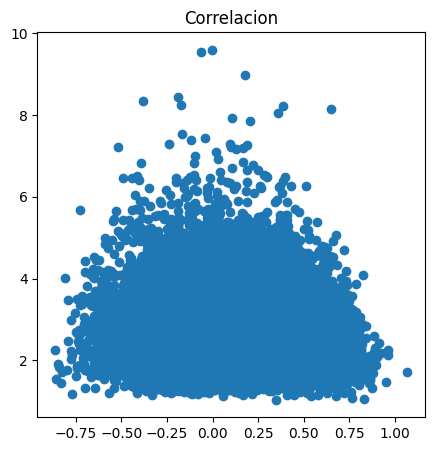

[[1.         0.00705163]
 [0.00705163 1.        ]]
Coeficiente de Correlacion con el Ancho:


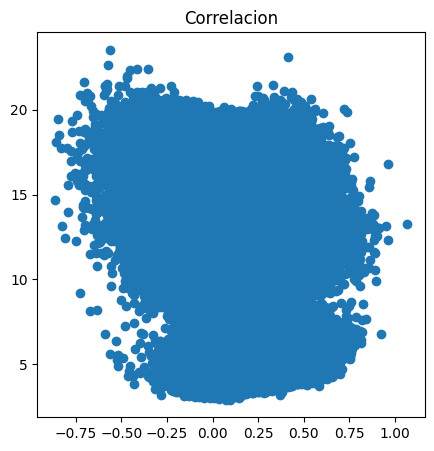

[[ 1.         -0.15834195]
 [-0.15834195  1.        ]]
Coeficiente de Correlacion con la Altura:


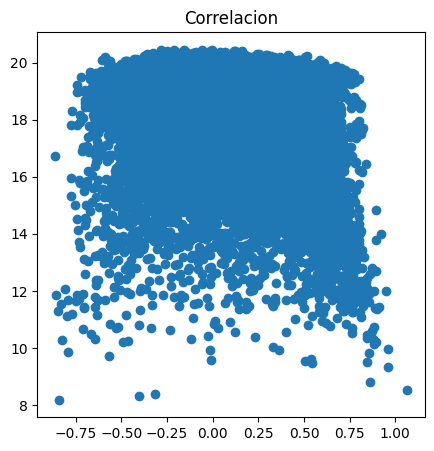

[[ 1.         -0.14276048]
 [-0.14276048  1.        ]]


In [ ]:
print("Coeficiente de Correlacion con la Area:")
coef=coefcorr(y_train_morpho,y_train_morpho_A)
print(coef)

print("Coeficiente de Correlacion con la Longtitud:")
coef=coefcorr(y_train_morpho,y_train_morpho_L)
print(coef)

print("Coeficiente de Correlacion con el Espectro:")
coef=coefcorr(y_train_morpho,y_train_morpho_T)
print(coef)

print("Coeficiente de Correlacion con el Ancho:")
coef=coefcorr(y_train_morpho,y_train_morpho_W)
print(coef)

print("Coeficiente de Correlacion con la Altura:")
coef=coefcorr(y_train_morpho,y_train_morpho_H)
print(coef)

5


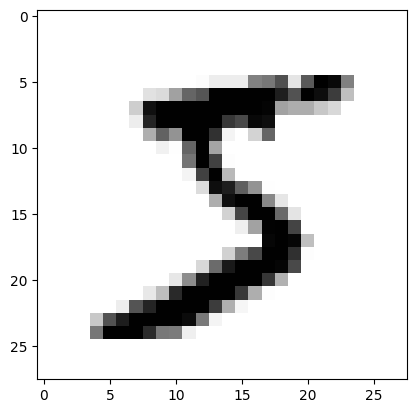

7



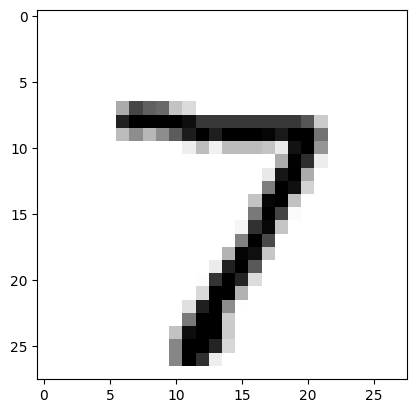

In [ ]:

plt.imshow(x_train_mnist[0],cmap=plt.cm.binary)
print(y_train_mnist[0])
plt.show()
plt.imshow(x_test_mnist[0],cmap=plt.cm.binary)
print(y_test_mnist[0])
print()


##Inclinacion a partir de una Imagen

In [ ]:

modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.relu),
  tf.keras.layers.Dense(1) #Para redes de clasificacion
])
modelo.summary()
modelo.compile(
    optimizer='adam',
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanAbsoluteError()])
#Entrenar
historial = modelo.fit(x = x_train_mnist/255, y = y_train_morpho,batch_size = 128,validation_data=(x_test_mnist, y_test_morpho) ,epochs=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_11 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 200)               157000    
                                                                 
 batch_normalization_12 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 200)               40200     
                                                                 
 dense_18 (Dense)            (None, 1)                

In [ ]:
predictions_test = modelo.predict(x_test_mnist)
print("PREDICCION",predictions_test[0])
print("TEST",y_test_morpho[0])

313/313 [==============================] - 1s 2ms/step
[[ 0.04950768]
 [-0.16760981]
 [ 0.29206687]
 ...
 [ 0.17593835]
 [ 0.5310325 ]
 [ 0.16455187]]
hola [ 0.07096857 -0.1738857   0.29039224 ...  0.19629262  0.530398
  0.13518087]


##Agregado de el ancho como pixeles a la informacion de la imagen

In [ ]:
def agregar_columna(arreglo):
    filas, columnas, cantidad = arreglo.shape
    nueva_columna = np.random.randint(0, 255, size=(filas, 1, cantidad))
    arreglo_con_columna = np.hstack((arreglo, nueva_columna))
    return arreglo_con_columna


In [ ]:

x_train_mnist_mod=agregar_columna(x_train_mnist)
for idx in range(60000):
  x_train_mnist_mod[idx][28:]=y_train_morpho_W[idx]

x_test_mnist_mod=agregar_columna(x_test_mnist)
for idx in range(10000):
  x_train_mnist_mod[idx][28:]=y_test_morpho_W[idx]

In [ ]:

modelo_mod = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(29,28)),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(), activation=tf.nn.relu),
  tf.keras.layers.BatchNormalization(momentum=0.99),
  tf.keras.layers.Dense(200,kernel_constraint = tf.keras.constraints.max_norm(5),kernel_initializer=tf.keras.initializers.GlorotUniform(),activation=tf.nn.relu),
  tf.keras.layers.Dense(1) #Para redes de clasificacion
])
modelo_mod.summary()
modelo_mod.compile(
    optimizer='adam',
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.MeanAbsoluteError()])
#Entrenar
historial_mod = modelo_mod.fit(x = (x_train_mnist_mod/255), y = y_train_morpho,batch_size = 128,validation_data=(x_test_mnist_mod, y_test_morpho) ,epochs=20)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 812)               0         
                                                                 
 batch_normalization_32 (Bat  (None, 812)              3248      
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 200)               162600    
                                                                 
 batch_normalization_33 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 dense_40 (Dense)            (None, 200)               40200     
                                                                 
 dense_41 (Dense)            (None, 1)               

In [ ]:
predictions_test = modelo.predict(x_test_mnist_mod)
print("PREDICCION",predictions_test[0])
print("TEST",y_test_morpho[0])

313/313 [==============================] - 2s 5ms/step
PREDICCION [[ 0.19889115]
 [-0.1524388 ]
 [ 0.16043568]
 ...
 [ 0.00096035]
 [ 0.36173162]
 [ 0.03320538]]
TEST [ 0.07096857 -0.1738857   0.29039224 ...  0.19629262  0.530398
  0.13518087]
